# Gerardo de Miguel González

# Model selection Proof of Concept

## Libraries

### general

In [0]:
import pandas as pd
import numpy as np

In [0]:
#::GMG::seaborn: statistical data visualization for a heatmap of pandas.corr()
#::NOTE::There's a lot of fuss for 'heatmapping' with matplotlib only
# https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/image_annotated_heatmap.html
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#::GMG::Helpers
# https://stackabuse.com/how-to-format-dates-in-python/
import datetime

### training and testing

In [0]:
#::GMG::Split train and test: Provides a high-variance estimate of out-of-sample accuracy
# It is a general practice to avoid training and testing on the same data.
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
from sklearn.model_selection import train_test_split

In [0]:
#::GMG::k-fold split and CV score
# https://scikit-learn.org/stable/modules/cross_validation.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

### models

In [0]:
#::GMG::Logistic Regression (aka logit) for classification
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

In [0]:
#::GMG::Extra models for model selection
# https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
#::GMG::Persistence of the models
# https://docs.python.org/3.6/library/pickle.html
# https://scikit-learn.org/stable/modules/model_persistence.html
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
import pickle as pk

### metrics

In [0]:
#::GMG::Accuracy and Balanced Accuracy for taking into account the dataset (im)balance
# https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [0]:
#::GMG::ROC/AUC
# https://en.wikipedia.org/wiki/Receiver_operating_characteristic
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

In [0]:
#::GMG::More metrics
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
from sklearn.metrics import precision_score, recall_score, f1_score

In [0]:
#::GMG::NOTE::one report for all metrics and confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Dataset

### Load

**::GMG::** You may [download the data from kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/pima-indians-diabetes-database.zip/1) in zipped csv format (which *includes a header* with the column names by the way) using [the reference provided](https://www.kaggle.com/uciml/pima-indians-diabetes-database) in the Datacamp article *if you have an account in kaggle*. I haven't checked it but you should be able [to use the kaggle API](https://medium.com/@yvettewu.dw/tutorial-kaggle-api-google-colaboratory-1a054a382de0) to automate the download from code *with an API key* created with your account. 

**::GMG::** I've already downloaded the csv dataset *manually from kaggle* with my account  and placed it in a data folder.

In [0]:
#::GMG::NOTICE::Changed platform from IFCA DataScienceHub to Google Colaboratory
#       This cell has no meaning on this platform
#!ls data

In [0]:
#::GMG::Dataframe
#data = pd.read_csv("data/pima-indians-diabetes.csv")
#::NOTE::Colaboratory change, I get it from my Github
# https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url/41880513#41880513
data = pd.read_csv(
 'https://github.com/yerartdev/tfm-pb/raw/master/data/pima-indians-diabetes.csv'
)

In [17]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**::GMG::** There are 8 different integer and real features and the categorical (binary) *Outcome* (i.e. classification) where 1 stands for having diabetes, and 0 denotes not havving diabetes. The dataset is known to have missing values. Specifically, there are missing observations for some columns that are marked as a zero value. A zero value will be invalid for for body mass index or blood pressure, for example.

In [18]:
print("Diabetes data set dimensions : {}".format(data.shape))

Diabetes data set dimensions : (768, 9)


### Exploratory Data Analysis

In [19]:
#::GMG::Do the cleaning if need be
# https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
#::GMG::Statistics reveal some issues related to invalid values on some features, 
#       i.e. Glucose, BloodPressure, SkinThickness, Insulin and BMI 
#       which have ZEROS (min statistic) in their values!
#::NOTE::Do I need to standarize (scale) the features too?
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

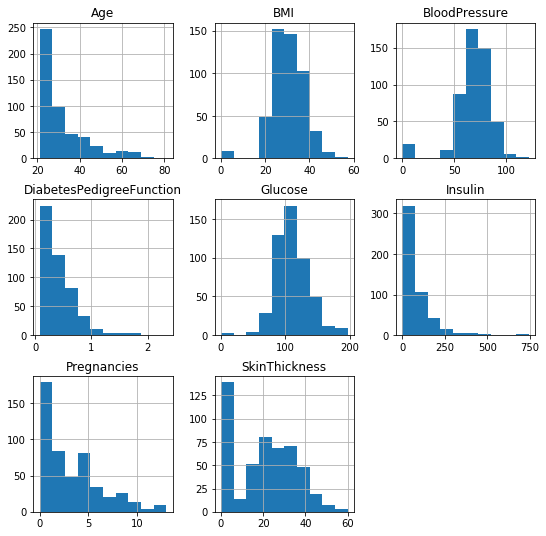

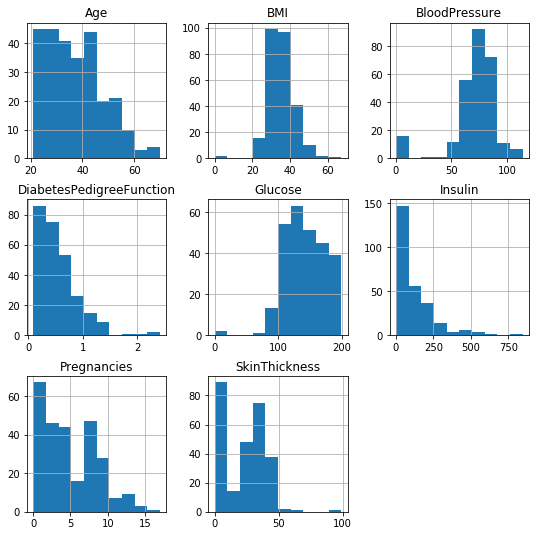

In [23]:
#::GMG::Histograms of the features grouped by Outcome
# https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8
#::NOTE::I can see the zeros in BMI, BloodPressure, Glucose, Insulin and SkinThickness!
data.groupby('Outcome').hist(figsize=(9, 9))

In [24]:
#::GMG::Unexpected outliers, as I've just said from data.describe() ...
#       Glucose, Insulin, BloodPressure, SkinThickness, and BMI 
#       which have zeros (min) in their values
# https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8
print("Zero Plasma Glucose  Total : ", data[data.Glucose == 0].shape[0])
print("Zero Insulin level   Total : ", data[data.Insulin == 0].shape[0])
print("Zero Blood Pressure  Total : ", data[data.BloodPressure == 0].shape[0])
print("Zero Skin Thickness  Total : ", data[data.SkinThickness == 0].shape[0])
print("Zero Body Mass Index Total : ", data[data.BMI == 0].shape[0])

Zero Plasma Glucose  Total :  5
Zero Insulin level   Total :  374
Zero Blood Pressure  Total :  35
Zero Skin Thickness  Total :  227
Zero Body Mass Index Total :  11


In [0]:
#::GMG::Hard choice to make ... remove the rows where the “BloodPressure”, 
#       “BMI” and “Glucose” are zero (small number of rows, low impact)
data_mod = data[(data.BloodPressure != 0) & 
                (data.BMI != 0) & 
                (data.Glucose != 0)
               ]

In [26]:
print(data_mod.shape)

(724, 9)


**::GMG::** The problem with `Insulin` and `Skin Thickness` is that they are a significant part of the dataset. They cannot be removed. I may use **an imputation method** to fill in the zeros, i.e. put *average/mean values*, but in this case putting a mean value to the blood pressure column *would send a wrong signal to the model*. I may also **avoid using the features** involved. Feature selection by filtering might come in handy and help with that. But the filter is going to use the *outliered* feature ... so I'm in doubt here!

In [27]:
#::GMG::Some basic (Pearson) correlations with Outcome
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
correlation_matrix = data_mod.corr()
correlation_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.488384
BMI                         0.299375
Age                         0.245741
Pregnancies                 0.224417
DiabetesPedigreeFunction    0.184947
BloodPressure               0.166703
Insulin                     0.145488
SkinThickness               0.092030
Name: Outcome, dtype: float64

**::GMG::** Based on this basic analysis I might avoid using `Skin Thickness` but not `Insulin` .

**::NOTE::** I've [searched](https://www.google.com/search?client=firefox-b-d&q=a+person+can+have+zero+insulin%3F) about this *zero insulin issue*. So [it turns out](https://www.yourhormones.info/hormones/insulin/) that

> People with type 1 diabetes produce very little or no insulin at all. This condition is caused when the beta cells that make insulin have been destroyed by antibodies (these are usually substances released by the body to fight against infections), hence they are unable to produce insulin.

In [28]:
#::GMG::I make a bold choice ...
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
data_final = data_mod.drop(columns = ['SkinThickness'])
print(data_final.shape)

(724, 8)


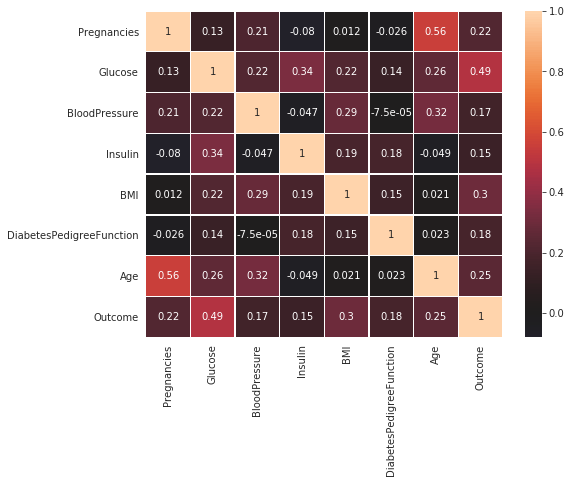

In [29]:
#::GMG::Not much insight from these corr() numbers
color = sns.color_palette()
sns.set_style('darkgrid')
plt.subplots(figsize=(8,6))
sns.heatmap(data_final.corr(), center=0, annot=True, linewidths=.3)

In [30]:
#::GMG::Beware of the imbalance dataset ...
#       https://www.quora.com/What-is-an-imbalanced-dataset
#       https://www.datacamp.com/community/tutorials/diving-deep-imbalanced-data
#       https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
#       How do I check?
# https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8
data_final.groupby('Outcome').size()

Outcome
0    475
1    249
dtype: int64

Text(0, 0.5, 'Frequency %')

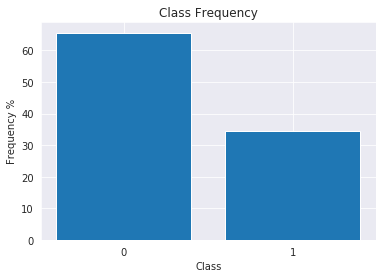

In [31]:
#::GMG::Say, 0 healthy, 1 diabetes
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.chararray.astype.html
# https://matplotlib.org/gallery/lines_bars_and_markers/categorical_variables.html
classes = data_final.Outcome.values
unique, counts = np.unique(classes, return_counts=True)
plt.bar(unique.astype(np.character),100*counts/classes.size)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency %')

## Model selection

### models

In [0]:
#::GMG::Menu
#::NOTE::I follow the recipe by Lahiru Liyanapathirana
# https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8
models = []

In [0]:
#::GMG::Add the methods to train and test, mostly default parameters 
#       but random_state and class_weight where available and others to avoid 'future warnings'
#
# class_weight: The “balanced” mode uses the values of y to automatically adjust weights inversely 
# proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
#
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
#
#::NOTE::Future Warning on first run ...
#        FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 
#        0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' 
#        to avoid this warning.
#
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
#
#::NOTE::The “balanced_subsample” mode is the same as “balanced” except that weights are computed 
#        based on the bootstrap sample for every tree grown.
#        bootstrap : boolean, optional (default=True)
#        Whether bootstrap samples are used when building trees. If False, the whole datset is used 
#        to build each tree.
#
#::NOTE::Future Warning on first run ...
# FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
# "10 in version 0.20 to 100 in 0.22.", FutureWarning)
#
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(class_weight = 'balanced', 
                          gamma = 'scale', 
                          random_state = 1)))
models.append(('LR', LogisticRegression(solver = 'liblinear', 
                                        random_state = 1)))
models.append(('DT', DecisionTreeClassifier(class_weight = 'balanced', 
                                            random_state = 1)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators = 100, 
                                            class_weight = 'balanced_subsample', 
                                            random_state = 1)))
models.append(('GB', GradientBoostingClassifier(random_state = 1)))

### train, test, score

**::GMG::** As [told by Lahiru Liyanapathirana](https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8),

> Provides a *high-variance estimate* of out-of-sample accuracy but, train/test split is still useful because of its **flexibility and speed**

In [0]:
#::GMG::Let`s try something different
#       I'm going to preserve the proportions of classes with stratify parameter
# https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn
x_train, x_test, y_train, y_test = train_test_split(
    data_final.iloc[:,:data_final.shape[1] - 1], data_final['Outcome'],
    test_size = 0.3,
    random_state = 70,
    stratify = data_final['Outcome']
)

In [0]:
#::GMG::Storage for models and scores (metrics)
# https://stackoverflow.com/questions/2402646/python-initializing-multiple-lists-line
names, b_acc, precision, recall, f1, auc_pr, avg_prec = [], [], [], [], [], [], []

In [0]:
#::GMG::Train, Test and (accuracy) score each model in a row
#::NOTE::perhaps I should also include specificity/sensitivity (?)
for name, model in models:
    model.fit(x_train, y_train)
    #::NOTE::Persitence will have to wait in Colaboratory
    #        I need libraries and access to my Google drive
    # https://realpython.com/python-string-split-concatenate-join/
    # https://stackabuse.com/how-to-format-dates-in-python/
    #filename = '_'.join([name, 
    #                 str(datetime.date.today().year),
    #                 str(datetime.date.today().month),
    #                 str(datetime.date.today().day)
    #                ]) + '.model'
    # https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
    #pk.dump(obj = model, file = open('model/' + filename, 'wb'))
    y_pred = model.predict(x_test)
    #::NOTE::Not all models have predict_proba() as a function ...
    #prob = model.predict_proba(x_test)[:, 1]
    names.append(name)
    b_acc.append(balanced_accuracy_score(y_true = y_test, 
                                         y_pred = y_pred))
    precision.append(precision_score(y_true = y_test, 
                                     y_pred = y_pred, 
                                     average = 'weighted'))
    recall.append(recall_score(y_true = y_test, 
                               y_pred = y_pred, 
                               average = 'weighted'))
    f1.append(f1_score(y_true = y_test, 
                       y_pred = y_pred, 
                       average = 'weighted'))
    #::NOTE::auc() does not work, I don't know why
    #auc_pr.append(auc(recall_score(y_test, y_pred), precision_score(y_test, y_pred)))
    #avg_prec.append(average_precision_score(y_true = y_test, y_score = prob))

In [37]:
#::GMG::Pack the results nicely in a pandas dataframe for printing
# https://stackoverflow.com/questions/20937538/how-to-display-pandas-dataframe-of-floats-using-a-format-string-for-columns
pd.options.display.float_format = '{:,.3f}'.format
results = pd.DataFrame({'Name': names, 
                        'Balanced_Acc': b_acc,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1#,
                        #'AUC': auc_pr,
                        #'Avg_Precision': avg_precision
                       }
                      )
# https://stackoverflow.com/questions/40990700/pandas-dataframes-in-jupyter-columns-of-equal-width-and-centered?rq=1
#d = dict(selector="th", props=[('text-align', 'center')])
#results.style.set_properties(**{'width':'10em', 'text-align':'center'}).set_table_styles([d])
# https://stackoverflow.com/questions/24644656/how-to-print-pandas-dataframe-without-index
print(results.to_string(index = False))

Name  Balanced_Acc  Precision  Recall    F1
 KNN         0.720      0.752   0.757 0.754
 SVC         0.772      0.788   0.775 0.779
  LR         0.745      0.803   0.803 0.792
  DT         0.641      0.679   0.683 0.681
 GNB         0.777      0.805   0.807 0.805
  RF         0.717      0.760   0.766 0.759
  GB         0.720      0.752   0.757 0.754


In [38]:
#::GMG::I rank the models by Balanced Accuracy
# https://www.geeksforgeeks.org/ranking-rows-of-pandas-dataframe/
#::NOTE::Should I draw de precision-recall curve of the two best models?
results['Rank'] = results['Balanced_Acc'].rank(ascending = 0)
results.set_index('Rank', inplace = True)
results.sort_index(ascending = 1, inplace = True)
print(results)

      Name  Balanced_Acc  Precision  Recall    F1
Rank                                             
1.000  GNB         0.777      0.805   0.807 0.805
2.000  SVC         0.772      0.788   0.775 0.779
3.000   LR         0.745      0.803   0.803 0.792
4.500  KNN         0.720      0.752   0.757 0.754
4.500   GB         0.720      0.752   0.757 0.754
6.000   RF         0.717      0.760   0.766 0.759
7.000   DT         0.641      0.679   0.683 0.681


**::GMG::** Based on the results **`Gaussian Naive Bayes`** (GNB) is the best model. Its `balanced accuracy`, `precision`  and `recall` are the best. The latter is important if its intended use is being a *diabetes* diagnosis tool, right?  **`Linear Regression`**  (LR) is really close in `precision` and  `recall`.

### k-fold cross validation score

**::GMG::** As [told by Lahiru Liyanapathirana](https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8),

> **More accurate** estimate of out-of-sample accuracy. More “efficient” use of data (every observation is used for both training and testing) BUT **much slower** than Train/Test split



In [0]:
#::GMG::First try one single metric: balanced accuracy
# https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values
# https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics
names, score, std_dev = [],[], []

In [0]:
#::GMG::10-fold CV score (balanced accuracy)
for name, model in models:
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
    kfold = StratifiedKFold(n_splits = 10, 
                  random_state = 10)
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
    scores = cross_val_score(model, 
                            data_final.iloc[:,:data_final.shape[1] - 1], 
                            data_final['Outcome'], 
                            cv=kfold, 
                            scoring='balanced_accuracy')
    #::NOTE::Persitence will have to wait in Colaboratory
    #        I need libraries and access to my Google drive    
    #filename = '_'.join(['cv', 'bacc', name, 
    #                 str(datetime.date.today().year),
    #                 str(datetime.date.today().month),
    #                 str(datetime.date.today().day)
    #                ]) + '.model'
    #pk.dump(obj = model, file = open('model/' + filename, 'wb'))    
    names.append(name)
    score.append(scores.mean())
    std_dev.append(scores.std())

In [57]:
#::GMG::Store results in a pandas dataframe
kf_cross_val = pd.DataFrame({'Name': names, 
                             'Score': score,
                             'Confidence': [x * 2 for x in std_dev]
                            }
                           )
print(kf_cross_val.to_string(index = False))

Name  Score  Confidence
 KNN  0.685       0.101
 SVC  0.705       0.080
  LR  0.717       0.070
  DT  0.668       0.118
 GNB  0.729       0.057
  RF  0.738       0.113
  GB  0.723       0.115


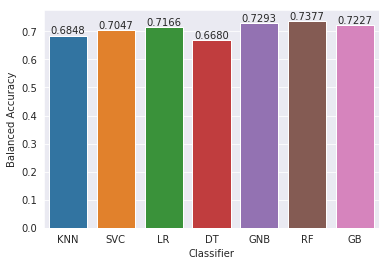

In [58]:
#::GMG::Barplot to see differences
axis = sns.barplot(x = 'Name', 
                   y = 'Score', 
                   data = kf_cross_val.loc[:,('Name', 'Score')])
axis.set(xlabel='Classifier', ylabel='Balanced Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, 
              height + 0.005, '{:1.4f}'.format(height), 
              ha="center") 

In [59]:
#::GMG::Sort the models by scores
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
# https://thispointer.com/pandas-sort-rows-or-columns-in-dataframe-based-on-values-using-dataframe-sort_values/
# https://stackoverflow.com/questions/24644656/how-to-print-pandas-dataframe-without-index
print(
    kf_cross_val.loc[:,('Name', 'Score')].sort_values(
            by ='Score', 
            ascending = False).to_string(index=False)
)

Name  Score
  RF  0.738
 GNB  0.729
  GB  0.723
  LR  0.717
 SVC  0.705
 KNN  0.685
  DT  0.668


**::GMG::** With this method the order of performance of the models has changed and now the *ensemble* model  **`Random Forest`** (RF) is the best. At least if just the balanced accuracy score is taken into account. Perhaps it would be more relevant the `recall` score as I said before.

### Multiple scores k-fold cross validation

In [0]:
#::GMG:: I try multiple scores now
# https://scikit-learn.org/stable/modules/cross_validation.html#the-cross-validate-function-and-multiple-metric-evaluation
names, b_acc, precision, recall, f1 = [], [], [], [], []

In [0]:
#::GMG::First I specify the scores I want
# https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values
scoring = ['balanced_accuracy',
           'precision_weighted', 
           'recall_weighted',
           'f1_weighted']

In [0]:
#::GMG::10-fold CV multiple scores
for name, model in models:
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
    # cv : int, cross-validation generator or an iterable, optional
    # For integer/None inputs, if the estimator is a classifier and y is either 
    # binary or multiclass, StratifiedKFold is used. In all other cases, KFold 
    # is used.
    scores = cross_validate(model, 
                            data_final.iloc[:,:data_final.shape[1] - 1], 
                            data_final['Outcome'], 
                            cv = 10, 
                            scoring = scoring)
    #::NOTE::Persitence will have to wait in Colaboratory
    #        I need libraries and access to my Google drive    
    #filename = '_'.join(['cv', 'multi', name, 
    #                 str(datetime.date.today().year),
    #                 str(datetime.date.today().month),
    #                 str(datetime.date.today().day)
    #                ]) + '.model'
    #pk.dump(obj = model, file = open('model/' + filename, 'wb'))  
    #::NOTE::What about std() for 95% confidence? PENDING
    names.append(name)
    b_acc.append(scores['test_' + scoring[0]].mean())
    precision.append(scores['test_' + scoring[1]].mean())
    recall.append(scores['test_' + scoring[2]].mean())
    f1.append(scores['test_' + scoring[3]].mean())

In [80]:
#::GMG::Store results in a pandas dataframe
results = pd.DataFrame({'Name': names, 
                        'Balanced_Acc': b_acc,
                        'Precision': precision,
                        'Recall': recall,
                        'F1': f1
                       }
                      )
print(results.to_string(index = False))

Name  Balanced_Acc  Precision  Recall    F1
 KNN         0.685      0.728   0.728 0.722
 SVC         0.705      0.732   0.713 0.717
  LR         0.717      0.769   0.771 0.761
  DT         0.668      0.708   0.706 0.703
 GNB         0.729      0.764   0.764 0.761
  RF         0.738      0.785   0.783 0.775
  GB         0.723      0.763   0.763 0.756
